# Introduction
## Dataset: Cartel Stability (R Datasets)
#### Liam McKenzie
---
This dataset contains weekly observations on prices of grain, presence of ice in the Great Lakes, whether the transporter was a member of the grain cartel, and the amount of grain shipped weekly.   

Variables in this dataset include:
- **Categorical**:
  - Cartel
    - Boolean value answering is a railroad cartel active in the observation?  
  - Season
    - Indicates what time of year the observation was made. From R Datasets documentation, *"To match the weekly data, the calendar has been divided into 13 periods, each approximately 4 weeks long"*
  - Ice
    - Boolean value answering are the Great Lakes innavigable due to ice?
- **Numerical**:
  - Price
    -  How much it costs to ship grain *(per ton)* by rail
  - Quantity
    - Tonnage of grain transported by rail, each week

# Body
## Dataset: Cartel Stability (R Datasets)
---
- There are a total of six columns
- There are a total of 328 rows
- Columns are both categorical (2) and numerical (3) as shown in the introduction
- There is one column that provides no information, for the purpose of graphing certain values it was removed
- Mode for each categorical column:
  - Cartel:
  |Cartel|
  |------|
  |yes|

  - Season:
  |Season           |
  |-----------------|
  | Feb 26 - Mar 26 |
  | Jan  1 - Jan 28 |
  | Jan 29 - Feb 25 |
  | Mar 27 - Apr 23 |

- Mean, max, min values for each numerical column, where quantity is rounded to the nearest hundredth:
| Value | Quantity | Price |
|-------|----------|-------|
| Mean  |    25384.39     |   0.25   |
| Max   |    76407     |   0.4   |
| Min   |    4810     |   0.125   |

*Histograms and bar graphs, along with synopsis can be found at the bottom of this Jupyter Notebook*




# Code
---

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/AER/CartelStability.csv'
cartelDF = pd.read_csv(url)

In [63]:
cartelDF.head()

,rownames,price,cartel,quantity,season,ice
0,1,0.4,yes,13632,Jan 1 - Jan 28,yes
1,2,0.4,yes,20035,Jan 1 - Jan 28,yes
2,3,0.4,yes,16319,Jan 1 - Jan 28,yes
3,4,0.4,yes,12603,Jan 1 - Jan 28,yes
4,5,0.4,yes,23079,Jan 29 - Feb 25,yes


In [64]:
cartelDF.shape

(328, 6)

In [65]:
cartelDF.columns

Index(['rownames', 'price', 'cartel', 'quantity', 'season', 'ice'], dtype='object')

In [66]:
cartelDFNew = cartelDF.drop('rownames', axis=1)

In [67]:
cartelDFNew.head()

,price,cartel,quantity,season,ice
0,0.4,yes,13632,Jan 1 - Jan 28,yes
1,0.4,yes,20035,Jan 1 - Jan 28,yes
2,0.4,yes,16319,Jan 1 - Jan 28,yes
3,0.4,yes,12603,Jan 1 - Jan 28,yes
4,0.4,yes,23079,Jan 29 - Feb 25,yes


In [68]:
cartelDFNew.shape

(328, 5)

In [69]:
cartelDFNew.columns

Index(['price', 'cartel', 'quantity', 'season', 'ice'], dtype='object')

In [70]:
categoricalColumns = ['cartel', 'season', 'ice']
for column in categoricalColumns:
  print(f"Mode of column '{column}': ")
  print(cartelDFNew[column].mode())
  print("\n")

Mode of column 'cartel': 
0    yes
Name: cartel, dtype: object


Mode of column 'season': 
0    Feb 26 - Mar 26
1    Jan  1 - Jan 28
2    Jan 29 - Feb 25
3    Mar 27 - Apr 23
Name: season, dtype: object


Mode of column 'ice': 
0    no
Name: ice, dtype: object




In [71]:
numericalColumns = ['price', 'quantity']
for column in numericalColumns:
  meanVal = cartelDFNew[column].mean()
  print(f"Mean of column '{column}':\n {meanVal:.2f}\n")
print('\n')

for column in numericalColumns:
  maxVal = cartelDFNew[column].max()
  print(f"Max of column '{column}':\n {maxVal}\n")
print('\n')

for column in numericalColumns:
  minVal = cartelDFNew[column].min()
  print(f"Min of column '{column}':\n {minVal}\n")

Mean of column 'price':
 0.25

Mean of column 'quantity':
 25384.39



Max of column 'price':
 0.4

Max of column 'quantity':
 76407



Min of column 'price':
 0.125

Min of column 'quantity':
 4810



In [72]:
%matplotlib inline

# Graphs
---

## Histograms of 'price' and 'quantity'

The price histogram shows a multimodal distribution. Two curves are present from 0 - 0.2 and a second major curve from 0.25 to 0.4. The **y-axis** is how many times the price appeared, and the **x-axis** is the weekly price to ship a ton of grain.  
  

The quantity histogram shows a unimodal distribution with a peak in the 20,000 tons range. The **y-axis** is how many times the amount of tons shipped appeared, and the **x-axis** is the weekly total tonnage of grain shipped.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'quantity'}>]], dtype=object)

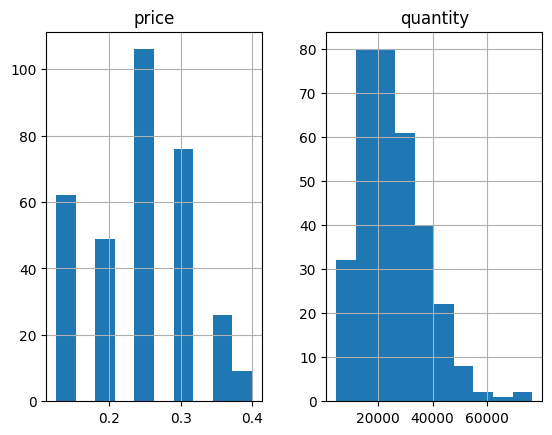

In [73]:
cartelDFNew[['price', 'quantity']].hist()

## Bar graphs of 'Cartel', 'Season', and 'Ice'

For the bar graph of 'cartel', the data is slightly imbalanced in favor of "yes" at 203 occurances vs "no" at 125.  

For the bar graph of 'season', the data is relatively balanced. This is expected because the 'season' variable evenly divides the weekly observations into month long periods.  

For the bar graph of 'ice', the data is relatively balanced. This is expected because ice impedement is a seasonal occurance.

There is also a bar graph of all three values combined. This graph shows the combination of occurances listed by <cartel - season - ice>. *While not necessary, the graph was generated accidentally by attempting to generate graphs for each value, and it shows an interesting pattern for combinations in this dataset*



In [74]:
cartelDFNew['ice'].value_counts()

,count
ice,
no,188
yes,140


<Axes: xlabel='cartel'>

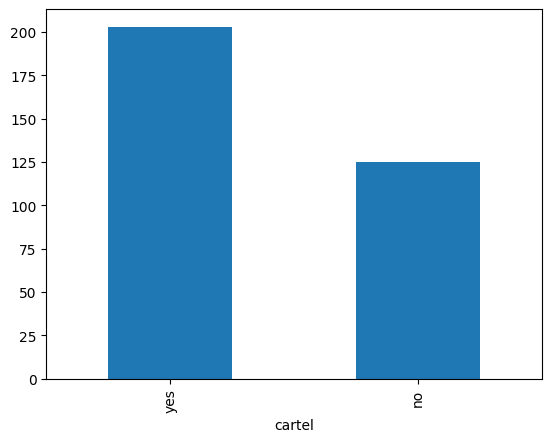

In [75]:
cartelDFNew['cartel'].value_counts().plot(kind='bar')

<Axes: xlabel='season'>

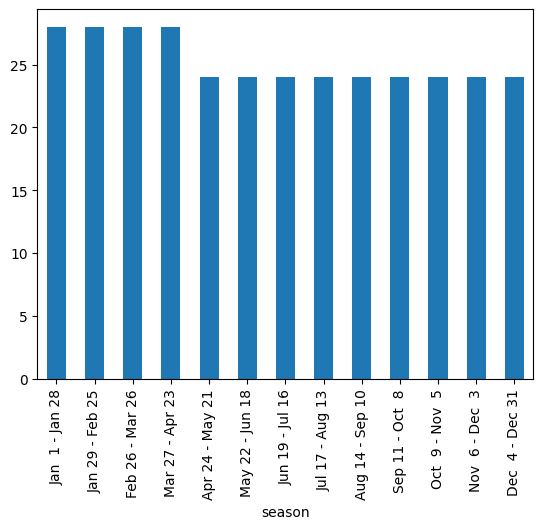

In [76]:
cartelDFNew['season'].value_counts().plot(kind='bar')

<Axes: xlabel='ice'>

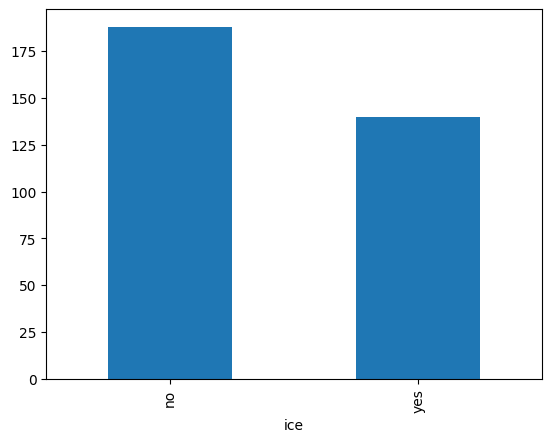

In [77]:
cartelDFNew['ice'].value_counts().plot(kind='bar')

<Axes: xlabel='cartel,season,ice'>

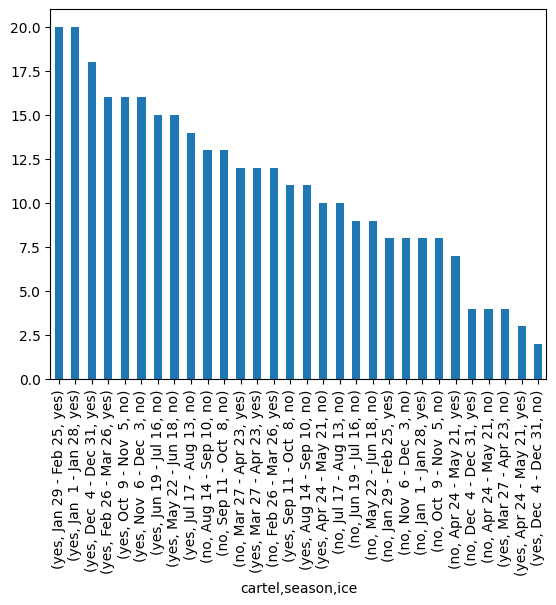

In [78]:
cartelDFNew[['cartel', 'season', 'ice']].value_counts().plot(kind='bar')